## Assignment on Model Selection

#### 1. Load the dataset into python environment

In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load dataset 
df = pd.read_csv("titanic_dataset1.csv")

In [3]:
# display first 5 rows
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### 2. Pre-processing steps

In [4]:
# number of rows and columns
df.shape

(891, 12)

In [5]:
# info of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
# check for null values
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

There are 177 missing values in Age column, 687 missing values in Cabin and 2 missing values in Embarked.

In [7]:
# summary statistics
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


There is variation in the scale of numerical columns.

In [8]:
# column names
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

#### Replace the missing values

In [9]:
# check the proportion of missing values in Age , Cabin and Embarked column

age_missing = df['Age'].isna().sum()/ len(df['Age'])
cabin_missing = df['Cabin'].isna().sum()/ len(df['Cabin'])
emb_missing = df['Embarked'].isna().sum()/ len(df['Embarked'])


In [10]:
print(f"{age_missing*100} % of age values are missing")
print(f"{cabin_missing*100} % of cabin values are missing")
print(f"{emb_missing*100} % of embarked values are missing")

19.865319865319865 % of age values are missing
77.10437710437711 % of cabin values are missing
0.22446689113355783 % of embarked values are missing


Since more than 75% of values are missing from Cabin, it can be dropped from dataset.

In [11]:
#drop cabin column
df1 = df.drop('Cabin', axis=1)

In [12]:
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


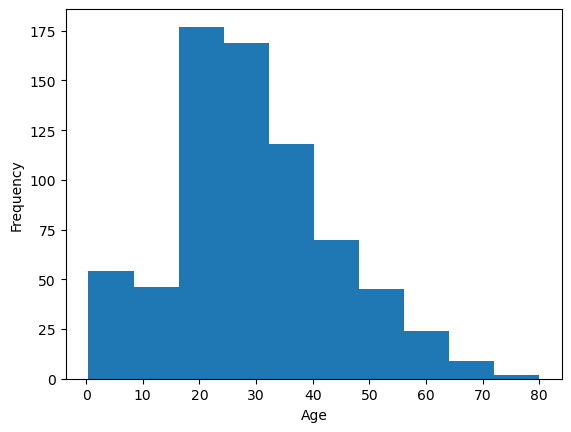

In [13]:
# explore age column
df1['Age'].plot(kind='hist')
plt.xlabel("Age")
plt.show()

The distribution of age is skewed to the right.

In [14]:
# check the rows where age is missing
df1[df1['Age'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,Q
...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,S


In [15]:
# fill the missing ages with median
df1['Age'] = df1['Age'].fillna(value=df1['Age'].median())

In [16]:
# check missing values
df1.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [17]:
# explore embarked column
df1['Embarked'].nunique()

3

In [18]:
# unique values in Embarked
df1['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [19]:
# count of each unique value
df1['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

missing values can be filled with mode , which is "S".

In [20]:
# fill missing embarked values with mode
df1['Embarked'] = df1['Embarked'].fillna("S")

In [21]:
df1.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [22]:
# unique values in passenger id
df1['PassengerId'].nunique()

891

In [23]:
# set passenger id column as index since all the values are unique
df1.set_index(df1['PassengerId'], inplace=True)

In [24]:
# drop Passenger Id column
df1.drop('PassengerId', axis=1, inplace=True)

In [25]:
df1.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [26]:
df1.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Embarked'],
      dtype='object')

#### Exploratory Data Analysis

In [27]:
# check unique values of survived column
df1['Survived'].unique()

array([0, 1], dtype=int64)

In [28]:
df1['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

Target classes are unevenly distributed

In [29]:
df1['Pclass'].unique()

array([3, 1, 2], dtype=int64)

In [30]:
df1['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

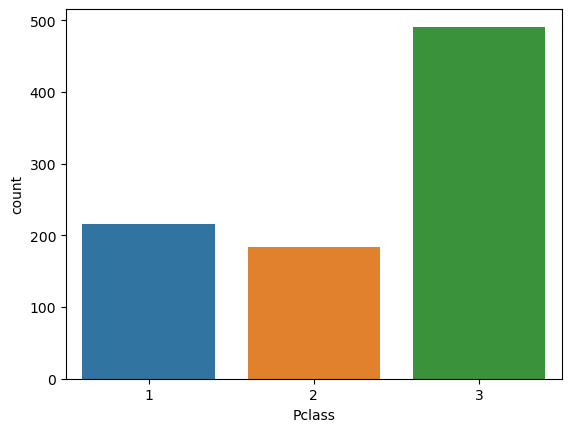

In [31]:
sns.countplot(x = df1['Pclass'])
plt.show()

Pclass 3 passengers were very high.

In [32]:
df1['Name'].nunique()

891

All the values in the name column are unique, hence can be dropped.

In [33]:
df1 = df1.drop('Name', axis=1)

In [34]:
df1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,
1,0,3,male,22.0,1,0,A/5 21171,7.2500,S
2,1,1,female,38.0,1,0,PC 17599,71.2833,C
3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,1,female,35.0,1,0,113803,53.1000,S
5,0,3,male,35.0,0,0,373450,8.0500,S


In [35]:
df1['Sex'].unique()

array(['male', 'female'], dtype=object)

<AxesSubplot:xlabel='Sex', ylabel='count'>

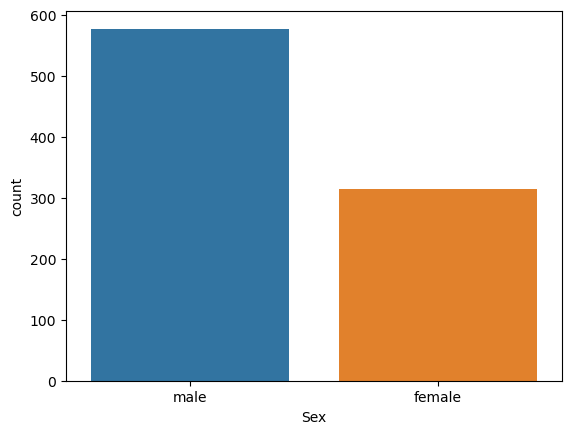

In [36]:
sns.countplot(x = df1['Sex'])

There were more male passengers.

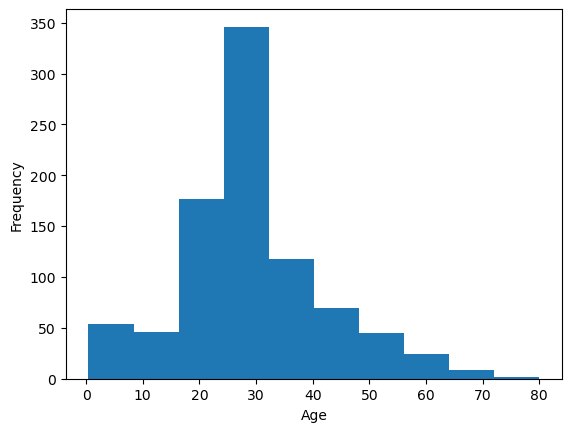

In [37]:
df1['Age'].plot(kind='hist')
plt.xlabel("Age")
plt.show()

Many passengers have age around 30.

In [38]:
df1['SibSp'].nunique()

7

In [39]:
df1['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

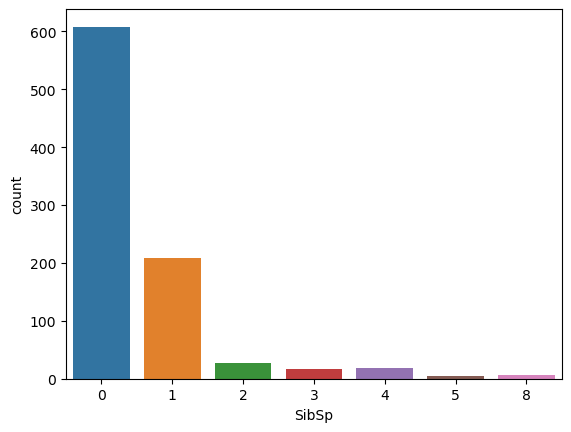

In [40]:
# distribution of SibSp
sns.countplot(x = df1['SibSp'])
plt.show()

Large number of passengers did not have any siblings or spouses aboard.

In [41]:
df1['Parch'].unique()

array([0, 1, 2, 5, 3, 4, 6], dtype=int64)

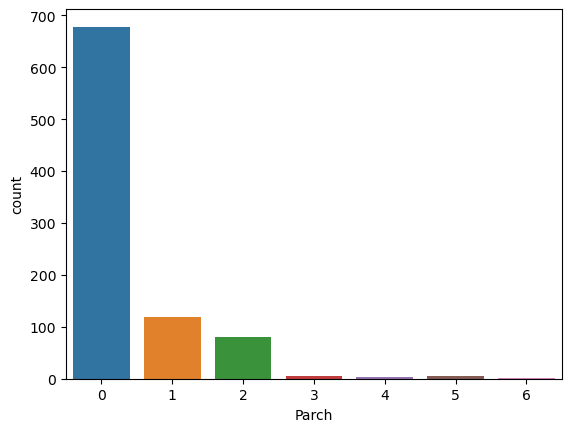

In [42]:
sns.countplot(x = df1['Parch'])
plt.show()

Majority of passengers had no parents or children aboard.

In [43]:
df1['Ticket'].nunique()

681

In [44]:
# sort the dataset by ticket number
df1.sort_values(['Ticket']).tail(20)

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,
730,0,3,female,25.0,1,0,STON/O2. 3101271,7.925,S
143,1,3,female,24.0,1,0,STON/O2. 3101279,15.850,S
404,0,3,male,28.0,1,0,STON/O2. 3101279,15.850,S
3,1,3,female,26.0,0,0,STON/O2. 3101282,7.925,S
217,1,3,female,27.0,0,0,STON/O2. 3101283,7.925,S
817,0,3,female,23.0,0,0,STON/O2. 3101290,7.925,S
227,1,2,male,19.0,0,0,SW/PP 751,10.500,S
527,1,2,female,50.0,0,0,W./C. 14258,10.500,S
243,0,2,male,29.0,0,0,W./C. 14263,10.500,S


In [45]:
df1['Fare'].nunique()

248

In [46]:
# check fare and ticket column together
df1[['Fare','Ticket']].value_counts()

Fare     Ticket           
56.4958  1601                 7
31.2750  347082               7
69.5500  CA. 2343             7
27.9000  347088               6
46.9000  CA 2144              6
                             ..
7.9250   STON/O 2. 3101293    1
         STON/O 2. 3101294    1
         STON/O2. 3101271     1
         STON/O2. 3101282     1
10.5000  C.A. 24580           1
Length: 682, dtype: int64

same ticket numbers have same fare.

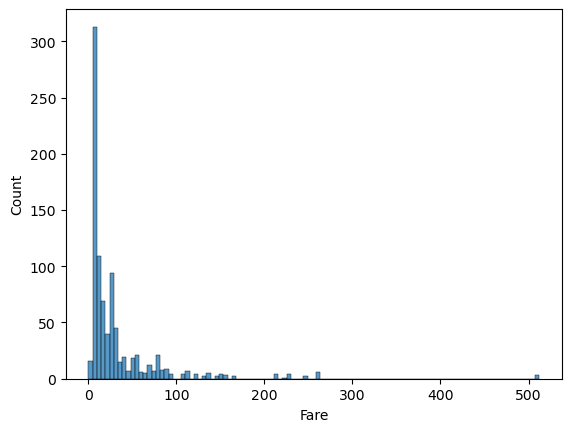

In [47]:
sns.histplot(x = df1['Fare'])
plt.show()

Distribution of Fare is skewed to the right.

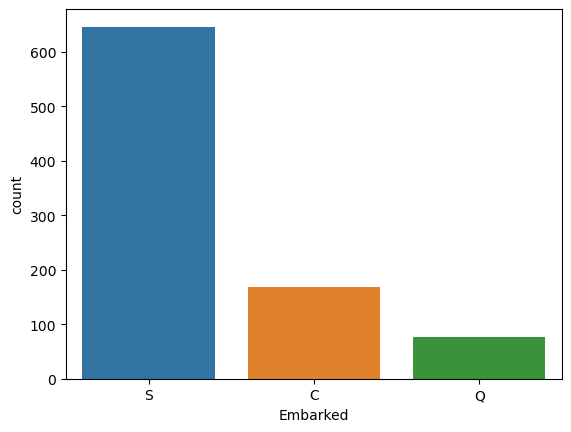

In [48]:
sns.countplot(x=df1['Embarked'])
plt.show()

Most of the passengers embarked from "S",Southampton.

In [49]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    object 
 7   Fare      891 non-null    float64
 8   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 69.6+ KB


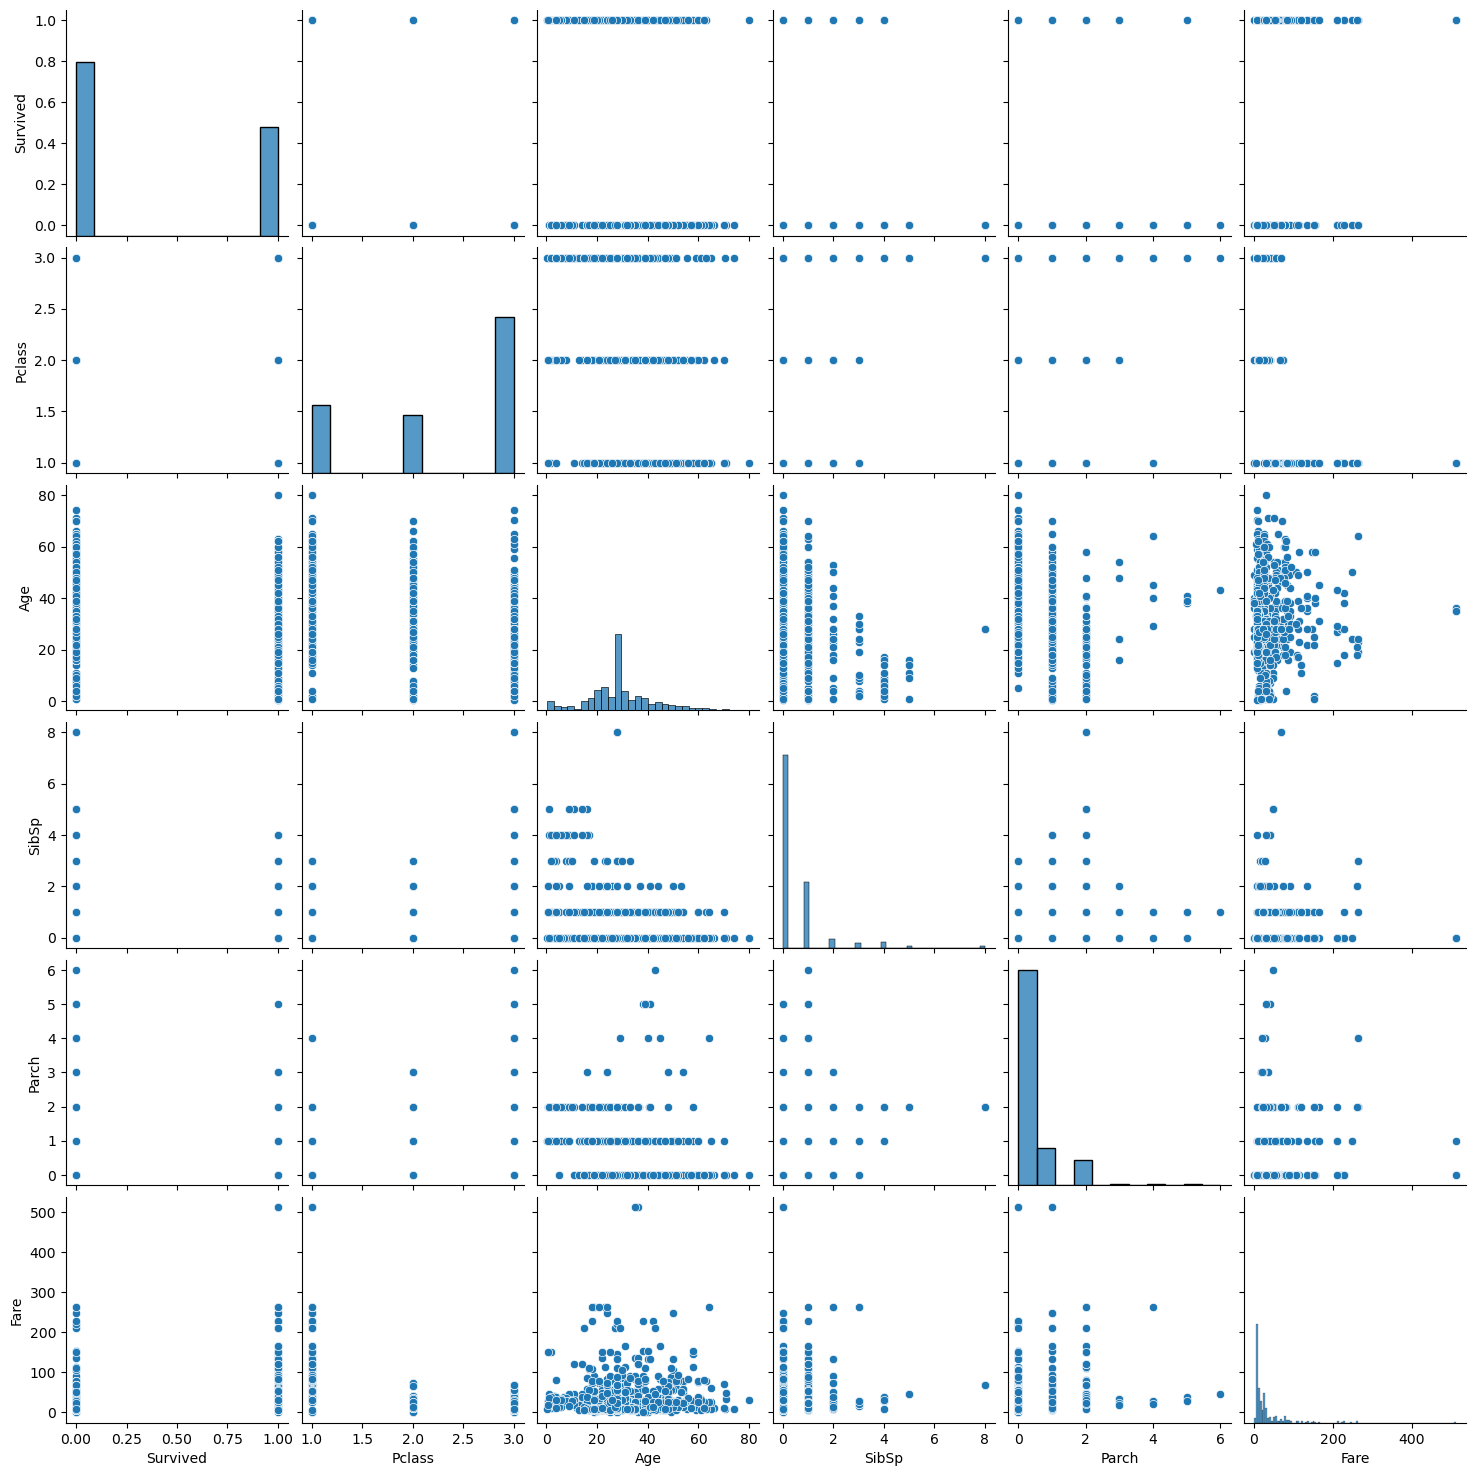

In [50]:
sns.pairplot(df1)
plt.show()

#### Encoding

In [51]:
# drop ticket column as it is an identifier
df1 = df1.drop('Ticket', axis=1)


In [52]:
# one hot encode sex and embarked column
df1 = pd.get_dummies(df1)

In [53]:
df1.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,
1,0,3,22.0,1,0,7.2500,0,1,0,0,1
2,1,1,38.0,1,0,71.2833,1,0,1,0,0
3,1,3,26.0,0,0,7.9250,1,0,0,0,1
4,1,1,35.0,1,0,53.1000,1,0,0,0,1
5,0,3,35.0,0,0,8.0500,0,1,0,0,1


In [54]:
# combine sibsp and parch to one column
df1['Family_members'] = df1['SibSp']+df1['Parch']

In [55]:
# drop sibsp and parch
df1 = df1.drop(['SibSp',"Parch"],axis=1)

In [56]:
df1.head()

,Survived,Pclass,Age,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Family_members
PassengerId,,,,,,,,,,
1,0,3,22.0,7.2500,0,1,0,0,1,1
2,1,1,38.0,71.2833,1,0,1,0,0,1
3,1,3,26.0,7.9250,1,0,0,0,1,0
4,1,1,35.0,53.1000,1,0,0,0,1,1
5,0,3,35.0,8.0500,0,1,0,0,1,0


#### Scaling

In [57]:
#standard scale Age and Fare columns
from sklearn.preprocessing import StandardScaler

std = StandardScaler()

df1.loc[:,['Age','Fare']] = std.fit_transform(df1.loc[:,['Age','Fare']])

In [58]:
df1.describe()

,Survived,Pclass,Age,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Family_members
count,891.000000,891.000000,8.910000e+02,8.910000e+02,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,3.841546e-16,-4.373606e-17,0.352413,0.647587,0.188552,0.086420,0.725028,0.904602
std,0.486592,0.836071,1.000562e+00,1.000562e+00,0.477990,0.477990,0.391372,0.281141,0.446751,1.613459
min,0.000000,1.000000,-2.224156e+00,-6.484217e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,-5.657365e-01,-4.891482e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,3.000000,-1.046374e-01,-3.573909e-01,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,3.000000,4.333115e-01,-2.424635e-02,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,3.000000,3.891554e+00,9.667167e+00,1.000000,1.000000,1.000000,1.000000,1.000000,10.000000


In [59]:
df1.head()

,Survived,Pclass,Age,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Family_members
PassengerId,,,,,,,,,,
1,0,3,-0.565736,-0.502445,0,1,0,0,1,1
2,1,1,0.663861,0.786845,1,0,1,0,0,1
3,1,3,-0.258337,-0.488854,1,0,0,0,1,0
4,1,1,0.433312,0.420730,1,0,0,0,1,1
5,0,3,0.433312,-0.486337,0,1,0,0,1,0


#### 3.KNN and SVM models

In [60]:
# split data into target and features
X = df1.drop('Survived', axis=1)
y = df1['Survived']

In [61]:
# hold out technique, split data into testing and training
from sklearn.model_selection import train_test_split


In [62]:
X_train, X_test, y_train , y_test = train_test_split(X,y, test_size=0.25 , random_state=42)

In [63]:
# kNN model
import warnings 
warnings.filterwarnings("ignore", category=FutureWarning)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

accuracies = []

# run for loop to find optimum neighbors
for neighbor in range(3,15):
    knn = KNeighborsClassifier(n_neighbors=neighbor)
    knn = knn.fit(X_train, y_train)
    knn_pred = knn.predict(X_test)
    accuracies.append(accuracy_score(y_test, knn_pred))

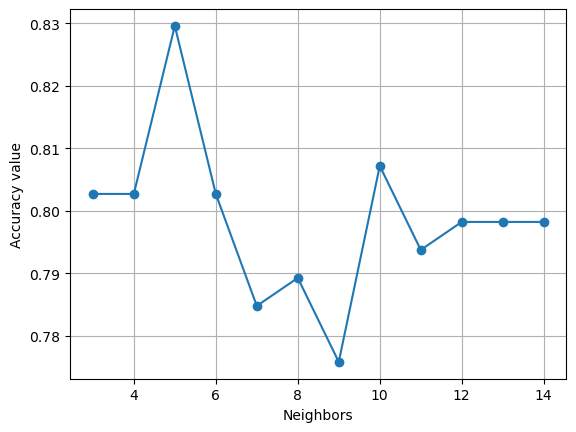

In [64]:
plt.plot(range(3,15), accuracies,marker="o")
plt.xlabel("Neighbors")
plt.ylabel("Accuracy value")
plt.grid()
plt.show()

Accuracy is highest for k-value = 5.

In [65]:
# create model with k-value 5
knn = KNeighborsClassifier(n_neighbors=5)
knn = knn.fit(X_train, y_train)


In [66]:
score_knn = knn.score(X_test, y_test)
print("The accuracy of kNN model using hold out method :",score_knn)

The accuracy of kNN model using hold out method : 0.8295964125560538


In [67]:
# create SVM model
from sklearn.svm import SVC

svm_model = SVC(kernel="linear")
svm_model = svm_model.fit(X_train, y_train)


In [68]:
score_svm = svm_model.score(X_test, y_test)
print("The accuracy of SVM model using hold out method :",score_svm)

The accuracy of SVM model using hold out method : 0.7847533632286996


#### 4. Cross Validation

#### K-fold Cross Validation

In [69]:
# import kfold 
from sklearn.model_selection import KFold

In [70]:
# create instance
kfold_validation = KFold(10)

In [71]:
# print the index of training and validation data
for train_index, val_index in kfold_validation.split(X,y):
    print("Training set index:", train_index)
    print("Validation set index:", val_index)

Training set index: [ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251
 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269
 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287
 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305
 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323
 324 325 326 327 328 329 330 33

In [72]:
# find cross-val score of knn model
from sklearn.model_selection import cross_val_score

In [73]:
cv_kmean = cross_val_score(knn,X,y,cv=kfold_validation)

In [74]:
print("The k-fold cross validation score of KNN model:\n",cv_kmean )

The k-fold cross validation score of KNN model:
 [0.77777778 0.83146067 0.78651685 0.76404494 0.79775281 0.82022472
 0.83146067 0.7752809  0.87640449 0.78651685]


In [75]:
print("The average k-fold cross validation score of KNN model:",cv_kmean.mean() )

The average k-fold cross validation score of KNN model: 0.8047440699126092


In [76]:
# find cross val score of svm model
cv_svm = cross_val_score(svm_model,X,y,cv=kfold_validation )

In [77]:
print("The k-fold cross validation score of SVM model:\n",cv_svm )

The k-fold cross validation score of SVM model:
 [0.81111111 0.82022472 0.75280899 0.84269663 0.76404494 0.79775281
 0.74157303 0.73033708 0.84269663 0.76404494]


In [78]:
print("The average k-fold cross validation score of SVM model:",cv_svm.mean() )

The average k-fold cross validation score of SVM model: 0.786729088639201


#### Stratified k-fold cross-validation

In [79]:
# import stratified k fold
from sklearn.model_selection import StratifiedKFold

In [80]:
# create an instance
sk_validation = StratifiedKFold(n_splits=10)

In [81]:
# print the index of training and validation data
for train_index, val_index in sk_validation.split(X,y):
    print("Training set index:", train_index)
    print("Validation set index:", val_index)

Training set index: [ 82  84  85  88  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251
 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269
 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287
 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305
 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323
 324 325 326 327 328 329 330 33

In [82]:
# find the cross-val score of knn model
knn_skcv = cross_val_score(knn, X,y, cv=sk_validation)

In [83]:
print("The stratified k-fold cross validation score of KNN model:\n",knn_skcv )

The stratified k-fold cross validation score of KNN model:
 [0.77777778 0.84269663 0.75280899 0.79775281 0.82022472 0.82022472
 0.85393258 0.78651685 0.85393258 0.78651685]


In [84]:
print("The average stratified k-fold cross validation score of KNN model:",knn_skcv.mean() )

The average stratified k-fold cross validation score of KNN model: 0.8092384519350813


In [85]:
# find cross-val score of svm model
svm_skcv = cross_val_score(svm_model, X,y, cv=sk_validation)

In [86]:
print("The stratified k-fold cross validation score of SVM model:\n",svm_skcv )

The stratified k-fold cross validation score of SVM model:
 [0.81111111 0.79775281 0.76404494 0.84269663 0.79775281 0.7752809
 0.76404494 0.74157303 0.80898876 0.76404494]


In [87]:
print("The average stratified k-fold cross validation score of SVM model:",svm_skcv.mean() )

The average stratified k-fold cross validation score of SVM model: 0.786729088639201


In [88]:
# summarize the accuracies into a new dataframe
scores={"Cross Validation Method":['Hold-Out Method',"K-fold","Stratified K-Fold"],"knn_model":[score_knn,cv_kmean.mean(),knn_skcv.mean()],"svm_model":[score_svm,  cv_svm.mean(), svm_skcv.mean()]}


In [89]:
summary_df  = pd.DataFrame(data=scores)
print(summary_df)

  Cross Validation Method  knn_model  svm_model
0         Hold-Out Method   0.829596   0.784753
1                  K-fold   0.804744   0.786729
2       Stratified K-Fold   0.809238   0.786729


Overall, KNN model shows better accuracy for the titanic dataset. Also,training this model with K-fold and stratified k-fold lowered the accuracies.